___
# Ciência dos Dados - PROJETO 1

## Milena Maluli

## Segurança Alimentar no Brasil

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!

http://g1.globo.com/bemestar/noticia/2014/12/72-milhoes-sofrem-com-inseguranca-alimentar-grave-no-pais-diz-pnad-2013.html


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\milen\OneDrive\Documentos\2o SEMESTRE\CDD\CD


In [3]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2009.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
dados=pd.read_csv('DOM2009csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [4]:
dados.V4621 = dados.V4621.astype('float')

#dados.V0202 = dados.V0202.astype('category')
dados.V2117 = dados.V2117.astype('category')

dados.V2132 = dados.V2132.astype('category')

dados.V0203 = dados.V0203.astype('category')

dados.V0221 = dados.V0221.astype('category')

dados.V0207 = dados.V0207.astype('category')

dados.V2105 = dados.V2105.astype('category')

dados.V0228 = dados.V0228.astype('category')

In [5]:

#dados.V0202.cat.categories = (['Casa', 'Ap','Dom'])
dados.V2117.cat.categories = (['Sim', 'Nao'])
dados.V2132.cat.categories = (['Sim', 'Nao'])
dados.V0203.cat.categories = (['Alven', 'Mad Aparelhada', 'Taipa','Mad Aproveitada','Palha','Outro Material'])
dados.V0221.cat.categories = (['Sim', 'Nao'])
dados.V0207.cat.categories = (['Próprio PAGO', 'Próprio', 'Alugado','Cedido por empregador','Cedido','Outro'])
dados.V2105.cat.categories = (['Sim', 'Não'])
dados.V0228.cat.categories = (['Sim, 2portas', 'Sim, 1porta','Não'])

In [6]:

dados.loc[(dados.V2117=='Sim') & (dados.V2132=='Sim'),'SENTIUFOME'] = 'Sim'
dados.loc[(dados.V2117=='Não') | (dados.V2132=='Não'),'SENTIUFOME'] = 'Não'

In [7]:
d= dados.loc[:,["V4621","V0207","V0203","V0221","V0228","SENTIUFOME","V2105"]]


In [8]:
d.columns = ['RENDA','OCUPAÇÃO','MATERIAL', 'ÁGUA CANALIZADA', 'GELADEIRA','SENTIUFOME','FALTAAL']
d.head()

,RENDA,OCUPAÇÃO,MATERIAL,ÁGUA CANALIZADA,GELADEIRA,SENTIUFOME,FALTAAL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118.0,Próprio PAGO,Mad Aproveitada,Sim,"Sim, 1porta",NaN,Sim
3,1053.0,Próprio PAGO,Alven,Sim,"Sim, 2portas",NaN,Não
4,930.0,Próprio PAGO,Alven,Sim,"Sim, 1porta",NaN,Não


In [16]:
d.to_csv('DataFramee1.csv', sep=';')

In [9]:
count = d.FALTAAL.value_counts(sort=False)
print(count)

Sim     21043
Não    100120
Name: FALTAAL, dtype: int64


Falta al por $  Sim  Não  All
RENDA                        
0.000000e+00    2.6  1.1  1.3
1.000000e+00    0.0  0.0  0.0
5.000000e+00    0.0  0.0  0.0
6.000000e+00    0.0  0.0  0.0
7.000000e+00    0.0  0.0  0.0
8.000000e+00    0.0  0.0  0.0
1.000000e+01    0.0  0.0  0.0
1.100000e+01    0.1  0.0  0.0
1.200000e+01    0.0  0.0  0.0
1.300000e+01    0.1  0.0  0.0
1.400000e+01    0.1  0.0  0.0
1.500000e+01    0.1  0.0  0.0
1.600000e+01    0.1  0.0  0.0
1.700000e+01    0.1  0.0  0.0
1.800000e+01    0.1  0.0  0.0
1.900000e+01    0.0  0.0  0.0
2.000000e+01    0.2  0.0  0.0
2.100000e+01    0.0  0.0  0.0
2.200000e+01    0.3  0.0  0.1
2.300000e+01    0.1  0.0  0.0
2.400000e+01    0.1  0.0  0.0
2.500000e+01    0.2  0.0  0.1
2.600000e+01    0.3  0.0  0.1
2.700000e+01    0.1  0.0  0.0
2.800000e+01    0.3  0.1  0.1
2.900000e+01    0.1  0.0  0.0
3.000000e+01    0.4  0.1  0.1
3.100000e+01    0.1  0.0  0.0
3.200000e+01    0.1  0.0  0.0
3.300000e+01    0.4  0.0  0.1
...             ...  ...  ...
2.260000e+

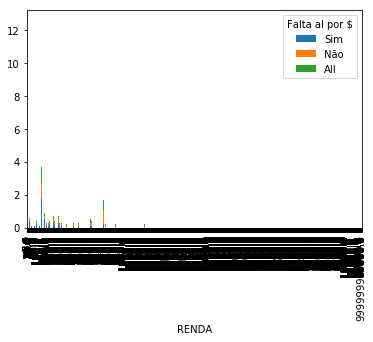

In [10]:
ctrf= (pd.crosstab(d.RENDA,d.FALTAAL,margins=True,rownames=['RENDA'], colnames=['Falta al por $'], normalize='columns')*100).round(decimals=1)
print(ctrf)
ctrf.plot(kind='bar', stacked=True)
fig = plt.figure(figsize=(15, 15)) #tamanho do gráfico
#plt.subplot(131) numero de linhas, colunas, e posição do gráfico. ajuda na comparação



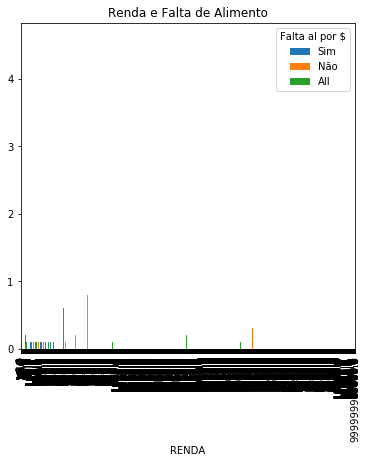

In [11]:
plot = ctrf.plot(kind='bar',title='Renda e Falta de Alimento',figsize=(6, 6))

In [12]:
#fig = plt.figure(figsize=(15, 5))
#subplots=True
ctrf.plot(kind='pie',autopct='%.1f',legend=False, figsize(7,7))
#plt.tight_layout()
#plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-12-c77f8c43bf49>, line 3)

___
## Conclusão 

Descreva aqui suas conclusões!